In [2]:
import requests 
import pandas as pd 
import datetime

In [3]:
# Set your OpenWeatherMap API key
api_key = 'fb365aa6104829b44455572365ff3b4e' 

In [4]:
# Set the location for which you want to retrieve weather data 
lat = 18.184135
lon = 74.610764

In [5]:
# https://openweathermap.org/api/one-call-3
# how	How to use api call 
# Construct the API URL
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

In [6]:
# Send a GET request to the API 
response = requests.get(api_url)
weather_data = response.json()
weather_data.keys()
len(weather_data['list'])
weather_data['list'][0]['weather'][0]['description']

'few clouds'

In [7]:
# Getting the data from dictionary and taking into one variable 
# Extract relevant weather attributes using list comprehension
temperatures = [item['main']['temp'] for item in weather_data['list']] 

# It will extract all values (40) and putting into one variable
timestamps = [pd.to_datetime(item['dt'], unit='s') for item in weather_data['list']]
temperature = [item['main']['temp'] for item in weather_data['list']]
humidity = [item['main']['humidity'] for item in weather_data['list']]
wind_speed = [item['wind']['speed'] for item in weather_data['list']]
weather_description = [item['weather'][0]['description'] for item in weather_data['list']]

In [8]:
# Create a pandas DataFrame with the extracted weather data
weather_df = pd.DataFrame({'Timestamp': timestamps, 
                           'Temperature': temperatures, 
                           'humidity': humidity, 
                           'wind_speed':wind_speed,
                           'weather_description': weather_description})

In [9]:
# Set the Timestamp column as the DataFrame's index
weather_df.set_index('Timestamp', inplace=True)
max_temp = weather_df['Temperature'].max()
print(f"Maximum Temperature - {max_temp}")
min_temp = weather_df['Temperature'].min()
print(f"Minimum Temperature - {min_temp}")

Maximum Temperature - 304.27
Minimum Temperature - 292.42


In [10]:
# Clean and preprocess the data # Handling missing values
weather_df.fillna(0, inplace=True) # Replace missing values with 0 or appropriate value

In [11]:
# Handling inconsistent format (if applicable)
weather_df['Temperature'] = weather_df['Temperature'].apply(lambda x: x - 273.15 if isinstance(x, float)else x)

In [12]:
# Convert temperature from Kelvin to Celsius
# Print the cleaned and preprocessed data print(weather_df)
print(weather_df)

                     Temperature  humidity  wind_speed weather_description
Timestamp                                                                 
2024-11-11 21:00:00        20.77        53        2.99          few clouds
2024-11-12 00:00:00        19.27        59        2.22    scattered clouds
2024-11-12 03:00:00        22.30        53        2.93          few clouds
2024-11-12 06:00:00        27.79        32        4.16          few clouds
2024-11-12 09:00:00        29.96        26        2.68          few clouds
2024-11-12 12:00:00        28.01        33        1.87    scattered clouds
2024-11-12 15:00:00        24.04        39        3.56       broken clouds
2024-11-12 18:00:00        22.09        51        2.71    scattered clouds
2024-11-12 21:00:00        20.64        57        2.32       broken clouds
2024-11-13 00:00:00        19.68        61        2.52       broken clouds
2024-11-13 03:00:00        23.17        53        2.96          few clouds
2024-11-13 06:00:00      

In [13]:
import matplotlib.pyplot as plt
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()

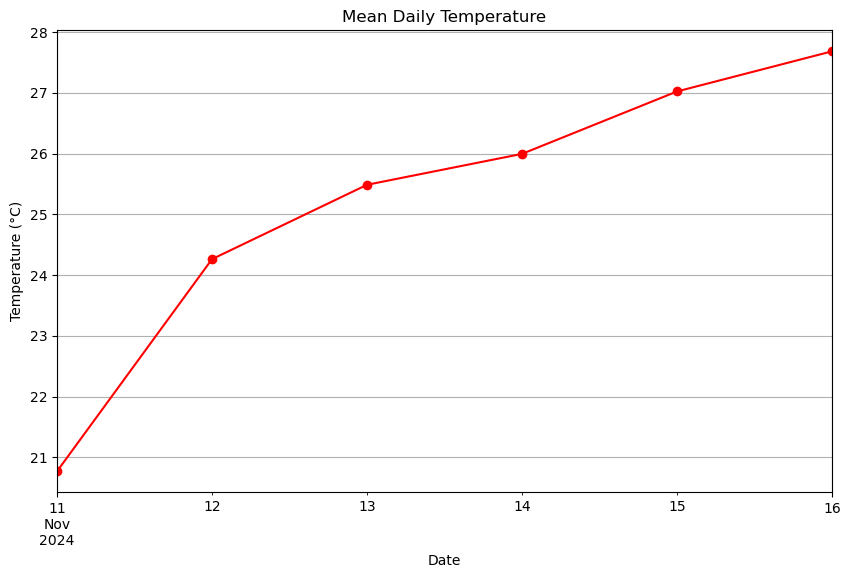

In [14]:
# Plot the mean daily temperature over time (Line plot)
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

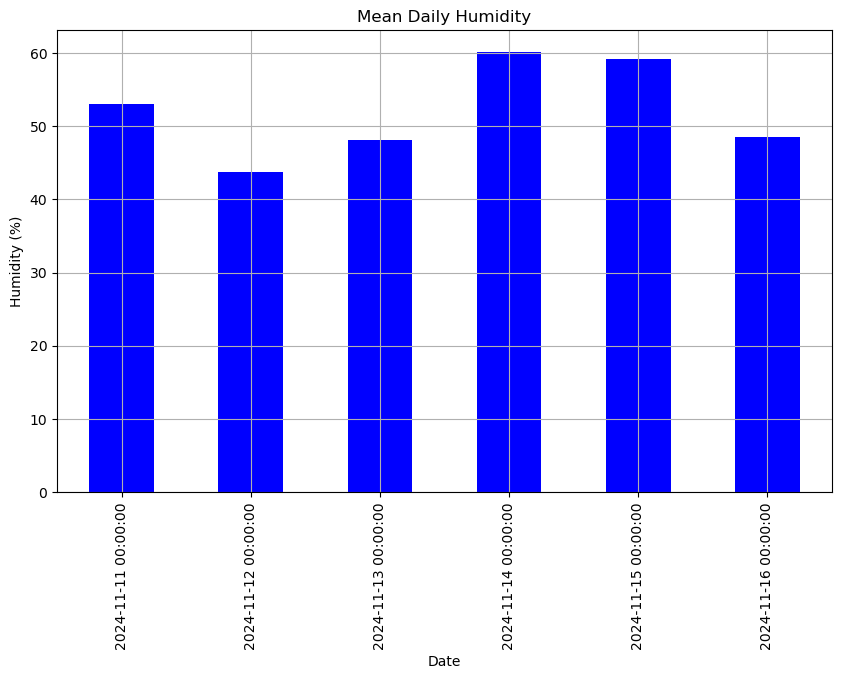

In [15]:
# Plot the mean daily humidity over time (Bar plot)
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

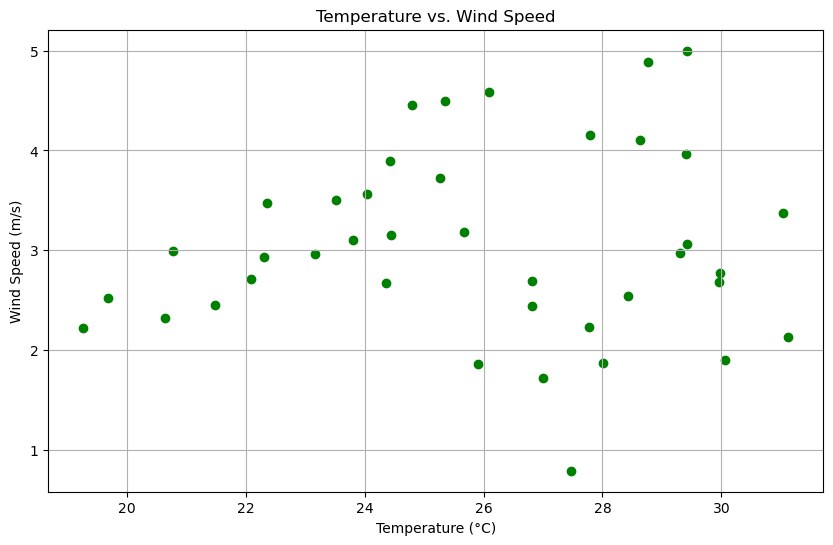

In [16]:
# Plot the relationship between temperature and wind speed (Scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

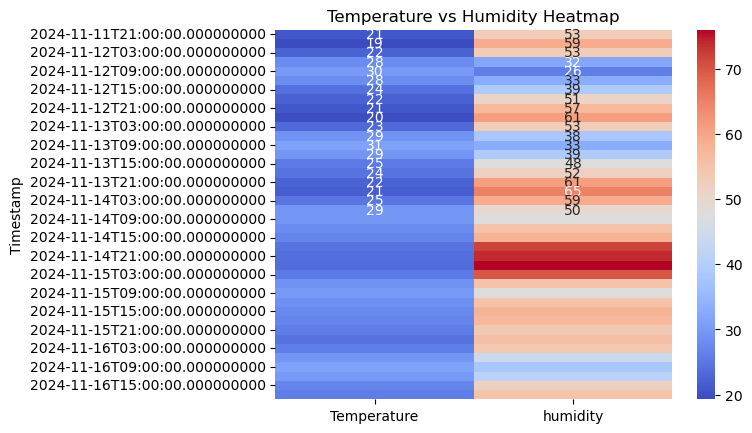

In [17]:
# Heatmap
import seaborn as sns
heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()

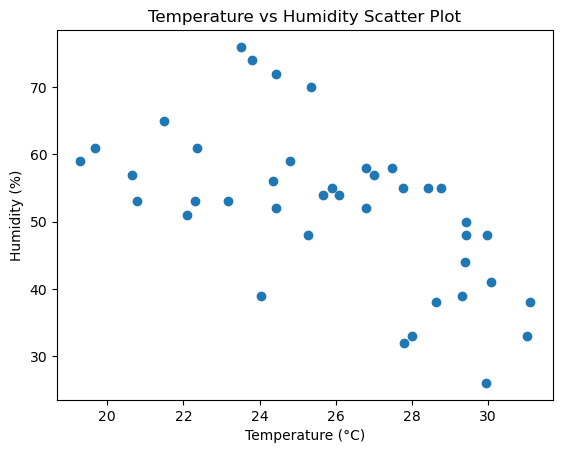

In [18]:
# Create a scatter plot to visualize the relationship between temperature and humidity
plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()